<a href="https://colab.research.google.com/github/Tahsin-Azad-Tias/Thesis/blob/main/feature_selection/RFECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id "1RgRboMvECzLO8rOz9PRIa_MKGa8D-WTN"
!gdown --id "1vNJKw3cPFho87sGMjxkEL-hQKAnfhECX"

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RgRboMvECzLO8rOz9PRIa_MKGa8D-WTN
To: /kaggle/working/preprocessed_data.csv
100%|██████████████████████████████████████| 86.0M/86.0M [00:01<00:00, 46.6MB/s]
/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vNJKw3cPFho87sGMjxkEL-hQKAnfhECX
To: /kaggle/working/preprocessed_test_data.csv
100%|███████████████████████████████████████| 25.8M/25.8M [00:00<00:00, 101MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/kaggle/working/preprocessed_data.csv")
test_df = pd.read_csv("/kaggle/working/preprocessed_test_data.csv")

In [ ]:
df.shape, test_df.shape

((21000, 224), (6300, 224))

In [ ]:
df['label1'] = ''
for i in range(df.shape[0]):
    label = math.floor(i / 1000)
    if label > 20:
        label = 20
    df.at[i, 'label1'] = label

df.head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,label1
0,42.649251,38.767720,32.457203,41.388078,42.934857,39.229342,32.399214,41.066192,43.236327,39.799927,...,41.635907,34.055494,32.751259,39.432463,41.247117,34.016271,34.245989,38.779399,40.378112,0
1,42.646681,38.794525,32.475357,41.388023,42.935162,39.260411,32.428105,41.096963,43.231703,39.824195,...,41.661284,34.068002,32.780622,39.422142,41.250901,34.045279,34.272890,38.762307,40.380140,0
2,42.642157,38.823611,32.491458,41.392758,42.933086,39.293407,32.451511,41.130370,43.225708,39.851598,...,41.690343,34.078913,32.812977,39.409877,41.259000,34.068001,34.302734,38.744395,40.386653,0
3,42.634547,38.856565,32.504395,41.405506,42.927218,39.329656,32.466020,41.168349,43.217712,39.884547,...,41.725618,34.086963,32.850102,39.394764,41.274208,34.079752,34.337226,38.725534,40.400572,0
4,42.623944,38.893494,32.514205,41.427199,42.917599,39.369161,32.471317,41.211253,43.208129,39.923785,...,41.767471,34.091368,32.891512,39.377517,41.297146,34.078598,34.375952,38.706636,40.422606,0


In [ ]:
test_df['label1'] = ''
for i in range(test_df.shape[0]):
    label = math.floor(i / 300)
    if label > 20:
        label = 20
    test_df.at[i, 'label1'] = label

test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,label1
0,42.147346,39.326350,29.890985,43.136659,42.461703,39.826034,29.672381,43.273464,42.778527,40.467358,...,43.769518,33.717622,30.327831,39.794666,43.154503,33.230918,32.108199,39.197549,42.432484,0
1,42.102956,39.291122,29.793977,43.096137,42.413188,39.795178,29.598609,43.232861,42.726119,40.426489,...,43.736592,33.699082,30.242326,39.744955,43.119075,33.201103,32.066806,39.143163,42.394341,0
2,42.063699,39.264767,29.708427,43.065561,42.369692,39.772260,29.533573,43.201669,42.678824,40.394525,...,43.712852,33.684147,30.172112,39.700804,43.092839,33.174210,32.035914,39.095089,42.365697,0
3,42.034200,39.253706,29.643911,43.052223,42.335739,39.762965,29.484701,43.186793,42.641297,40.377930,...,43.704868,33.676245,30.128628,39.667167,43.082515,33.153135,32.022934,39.058826,42.353496,0
4,42.018088,39.260527,29.606505,43.059177,42.314895,39.769486,29.456900,43.191129,42.617338,40.379274,...,43.714983,33.678181,30.117147,39.647968,43.090907,33.140730,32.030418,39.038428,42.360581,0


In [ ]:
df.groupby('label1').size()

label1
0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
11    1000
12    1000
13    1000
14    1000
15    1000
16    1000
17    1000
18    1000
19    1000
20    1000
dtype: int64

<Axes: >

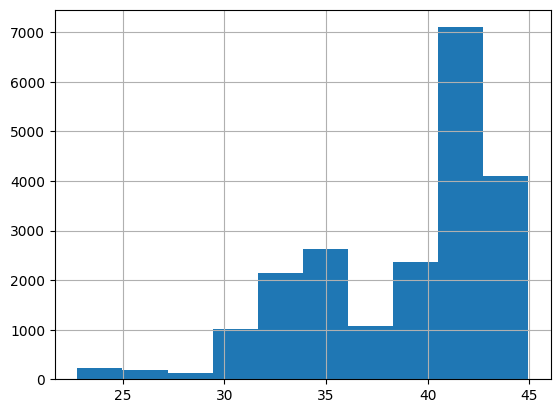

In [ ]:
df.iloc[:,8].hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


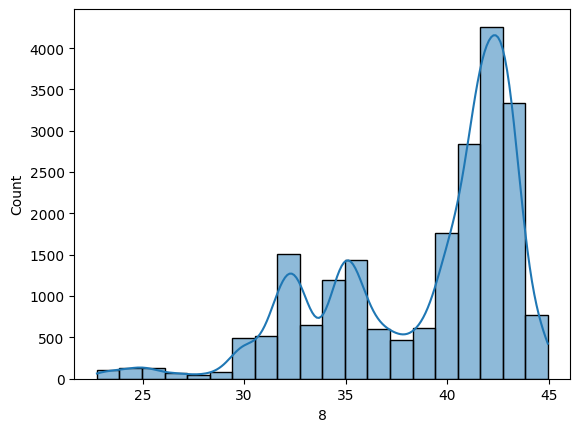

In [ ]:
sns.histplot(df.iloc[:, 8], kde=True, bins=20)
plt.show()

In [ ]:
feature_1  = df.columns[:5]

<Axes: >

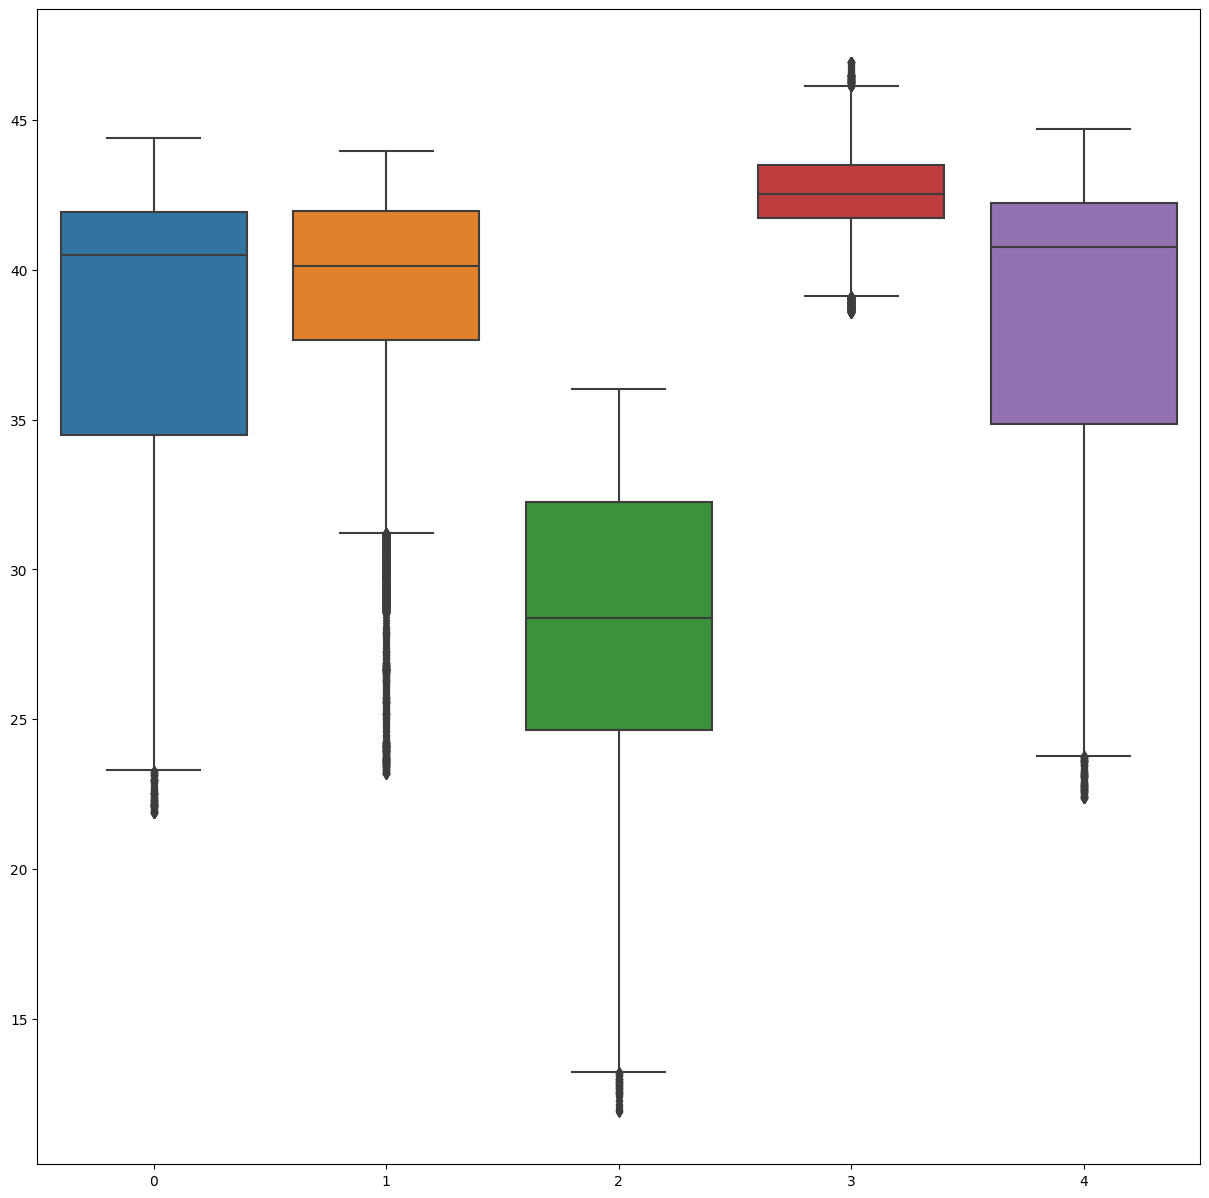

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = df[feature_1], ax=ax)

<Axes: >

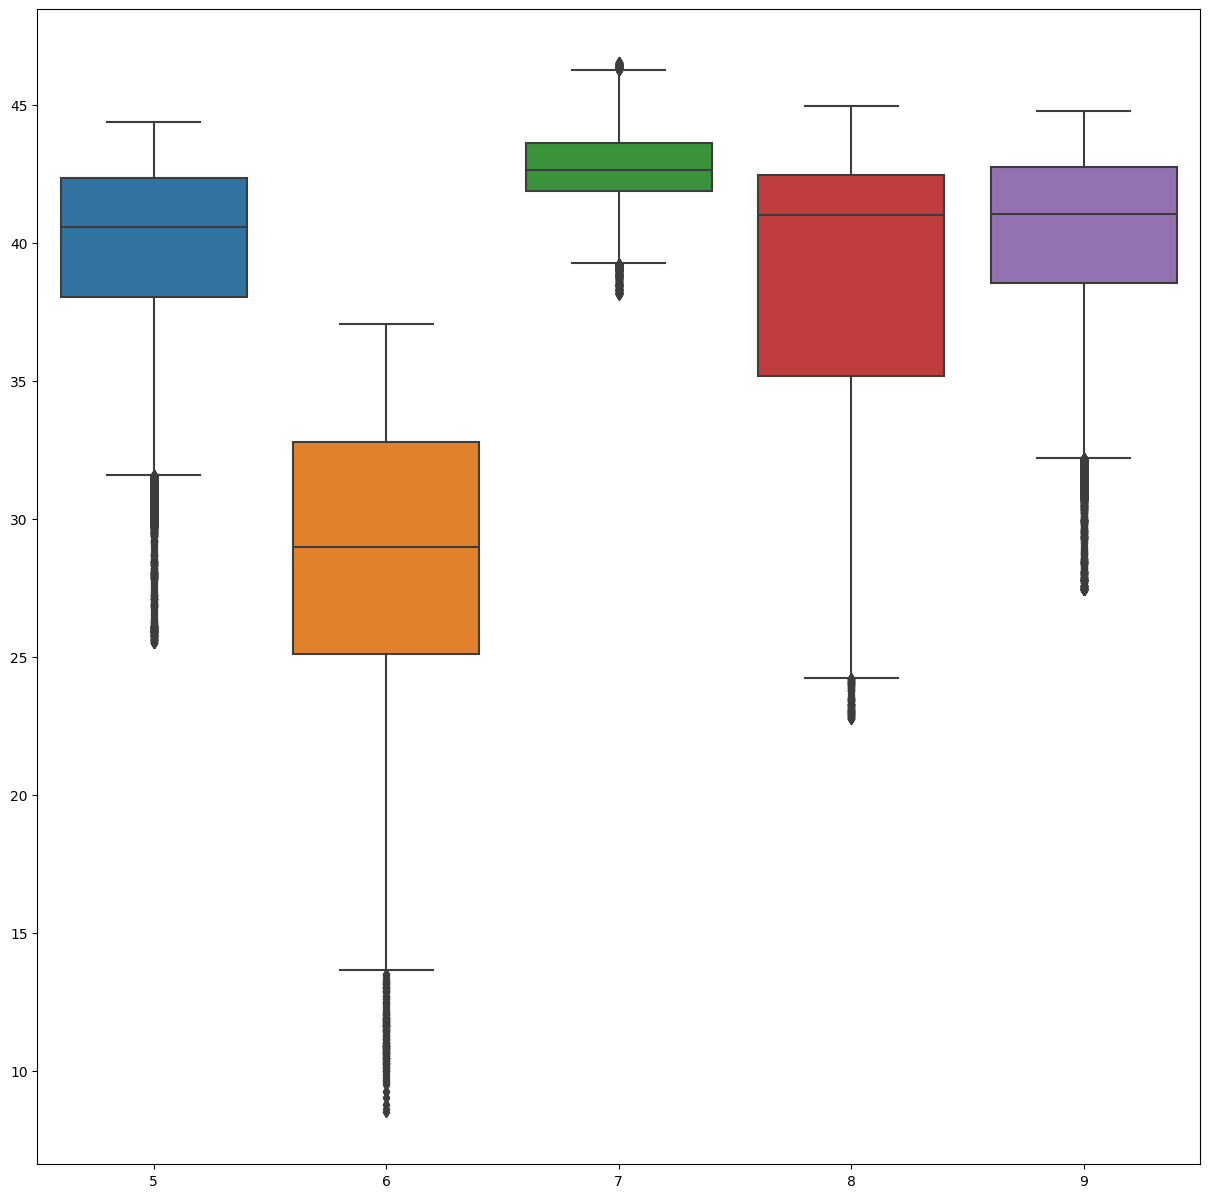

In [ ]:
feature_2  = df.columns[5:10]
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = df[feature_2], ax=ax)

<Axes: >

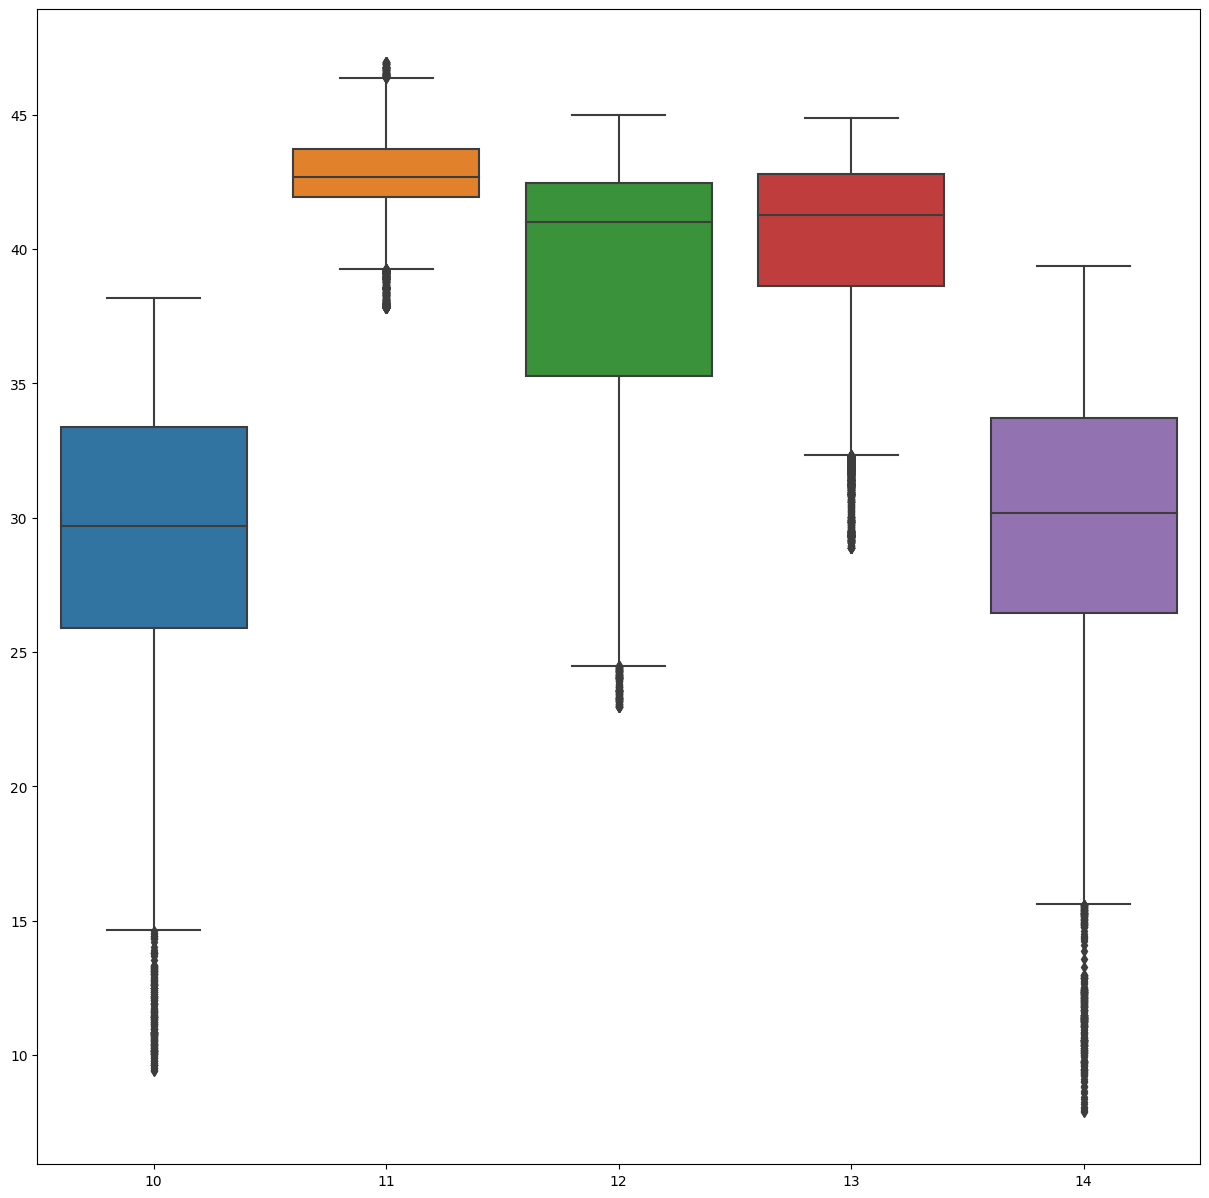

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = df[df.columns[10:15]], ax=ax)

In [ ]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '215', '216', '217', '218', '219', '220', '221', '222', '223',
       'label1'],
      dtype='object', length=225)

In [ ]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
220       0
221       0
222       0
223       0
label1    0
Length: 225, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
X = df.drop('label1', axis=1)

le = LabelEncoder()

y = le.fit_transform(df['label1'])
# Get the feature names
col_names = X.columns.tolist()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(n_jobs=-1), scoring='accuracy')

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 168


In [ ]:
# Get the mask of selected features
mask = rfecv.support_

# Get the names of the selected features
selected_features = X.columns[mask]

# Create a new DataFrame with the selected features
X_selected = X[selected_features]

# Save the DataFrame to a CSV file
# X_selected.to_csv('selected_features.csv', index=False)

In [ ]:
X_selected.to_csv('selected_features.csv', index=False)

In [ ]:
X = df.drop('label1', axis=1)
y = df['label1']

for col in df.columns[:-1]:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)

In [ ]:
X_outlier_detection = X[mask]
y_outlier_detection = y[mask]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

In [ ]:
new_df = pd.DataFrame(X_scaled, columns=X_outlier_detection.columns)

In [ ]:
new_df.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)

In [ ]:
new_df['label1'] = y_outlier_detection

In [ ]:
new_df['label2'] = np.where(new_df['label1'].isin(range(5)), 0, 1)

In [ ]:
new_df.groupby('label2').size()

label2
0     4861
1    15906
dtype: int64

<Axes: >

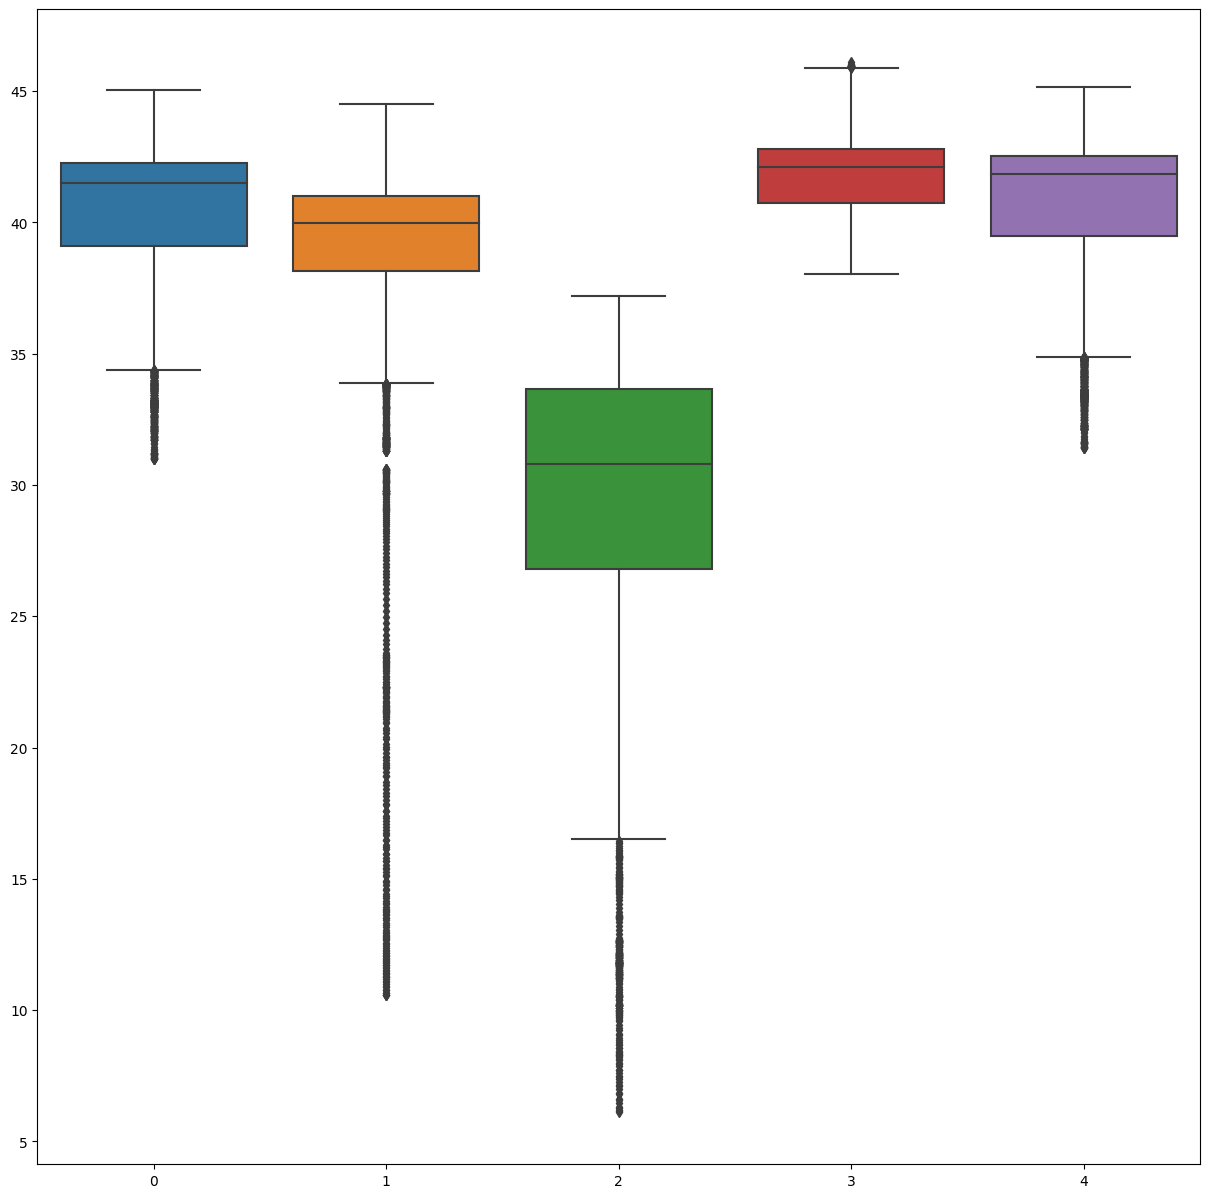

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = test_df[test_df.columns[0:5]], ax=ax)

In [ ]:
X = test_df.drop('label1', axis=1)
y = test_df['label1']

for col in test_df.columns[:-1]:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)

In [ ]:
X_outlier = X[mask]
y_outlier = y[mask]

In [ ]:
X_test_scaled = scaler.fit_transform(X_outlier)

In [ ]:
X_test_scaled.shape

(6144, 224)

In [ ]:
test_data = pd.DataFrame(X_test_scaled)

In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.614594,0.166026,0.126262,0.860486,0.627534,0.163867,-0.041221,0.862561,0.652458,0.191673,...,1.148453,2.167546,-0.635021,-1.417461,1.151806,2.135747,-0.747626,-1.231342,1.111459,2.077124
1,0.600615,0.158827,0.110377,0.832810,0.612132,0.156825,-0.053570,0.836469,0.635685,0.181163,...,1.135150,2.147232,-0.638823,-1.442786,1.138960,2.114894,-0.753993,-1.247234,1.097588,2.055911
2,0.588253,0.153442,0.096368,0.811927,0.598324,0.151594,-0.064457,0.816425,0.620548,0.172944,...,1.123405,2.132585,-0.641886,-1.463582,1.127550,2.099451,-0.759736,-1.259095,1.085328,2.039981
3,0.578964,0.151182,0.085804,0.802818,0.587545,0.149472,-0.072638,0.806866,0.608537,0.168676,...,1.114563,2.127659,-0.643506,-1.476461,1.118858,2.093375,-0.764236,-1.264078,1.076080,2.033196
4,0.573890,0.152576,0.079679,0.807567,0.580928,0.150961,-0.077292,0.809652,0.600869,0.169022,...,1.109609,2.133900,-0.643109,-1.479861,1.113897,2.098314,-0.766885,-1.261205,1.070878,2.037136


In [ ]:
test_data.reset_index(drop=True, inplace=True)
y_outlier.reset_index(drop=True, inplace=True)

In [ ]:
len(y_outlier)

6144

In [ ]:
test_data.shape

In [ ]:
test_data['label1'] = y_outlier

In [ ]:
test_data['label2'] = np.where(test_data['label1'].isin([0,1,2,3,4,16,17,18,19,20]), 0, 1)

In [ ]:
test_data.groupby('label2').size()

label2
0    2844
1    3300
dtype: int64

In [ ]:
test_data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
221       0
222       0
223       0
label1    0
label2    0
Length: 226, dtype: int64

In [ ]:
new_df.shape

(20767, 226)

In [ ]:
test_data.shape

(6144, 226)

In [ ]:
new_df.to_csv("train_data.csv",index= False)
test_data.to_csv("test_data.csv",index= False)